# COMP 472 - Assignment 1

## Import Librarys

In [2]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, classification_report
from sklearn.neural_network import MLPClassifier

## Load The CSVs to DFs

In [75]:
penguindf = pd.read_csv('penguins.csv')
abalonedf = pd.read_csv('abalone.csv')
output_array = []
display(penguindf)
display(abalonedf)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
331,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11
...,...,...,...,...,...,...,...,...,...
4172,F,0.570,0.450,0.150,0.9645,0.5310,0.1890,0.2090,9
4173,F,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10
4174,M,0.695,0.550,0.195,1.6645,0.7270,0.3600,0.4450,11
4175,F,0.585,0.475,0.165,1.0530,0.4580,0.2170,0.3000,11


## 1 Hot Vector Penguins DF

In [76]:
penguin_columns_to_encode = ['island','sex']
penguindf_encoded = pd.get_dummies(penguindf, columns=penguin_columns_to_encode, drop_first=True, dtype='float')
display(penguindf_encoded)


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181,3750,0.0,1.0,1.0
1,Adelie,39.5,17.4,186,3800,0.0,1.0,0.0
2,Adelie,40.3,18.0,195,3250,0.0,1.0,0.0
3,Adelie,36.7,19.3,193,3450,0.0,1.0,0.0
4,Adelie,39.3,20.6,190,3650,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214,4925,0.0,0.0,0.0
329,Gentoo,46.8,14.3,215,4850,0.0,0.0,0.0
330,Gentoo,50.4,15.7,222,5750,0.0,0.0,1.0
331,Gentoo,45.2,14.8,212,5200,0.0,0.0,0.0


## Plot Points on pie chart to check distribution


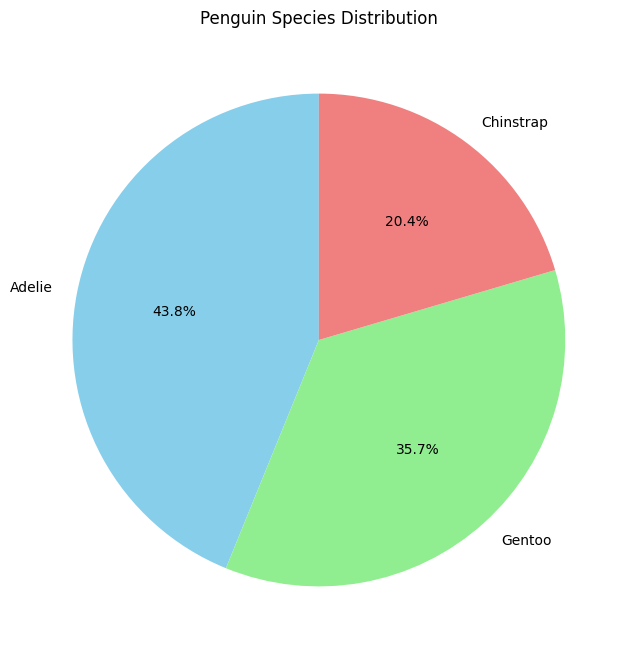

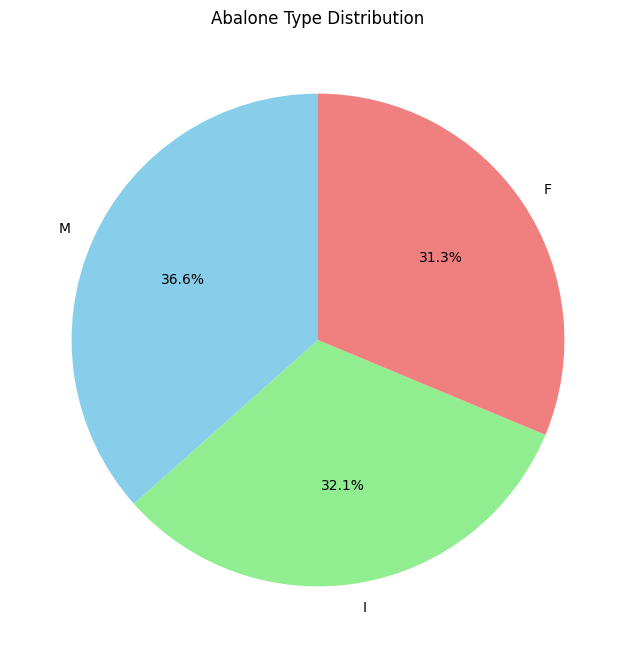

In [77]:
penguin_species_count = penguindf['species'].value_counts() # count the number of each species
abalone_type_count = abalonedf['Type'].value_counts() # count the number of each type


plt.figure(figsize=(8, 8))
plt.pie(penguin_species_count, labels=penguin_species_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Penguin Species Distribution')
plt.figure(figsize=(8, 8))
plt.pie(abalone_type_count, labels=abalone_type_count.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Abalone Type Distribution')
plt.show()

## Instantiate Averages

In [78]:
models = ['base_dt', 'top_dt', 'base_mlp', 'top_mlp']
metrics = ['accuracy', 'macro_average', 'weighted_average']

penguin_average = dict()
for model in models:
  penguin_average[model] = dict()
  for metric in metrics:
    penguin_average[model][metric] = []

abalone_average = dict()
for model in models:
  abalone_average[model] = dict()
  for metric in metrics:
    abalone_average[model][metric] = []

## Training and Predictions

### Split data for training

In [135]:
X_penguin = penguindf_encoded.drop('species', axis=1)
y_penguin = penguindf_encoded['species']
penguin_training_set = sklearn.model_selection.train_test_split(X_penguin,y_penguin)
X_penguin_train, X_penguin_test, y_penguin_train, y_penguin_test = penguin_training_set

X_abalone = abalonedf.drop('Type', axis=1)
y_abalone = abalonedf['Type']
abalone_training_set = sklearn.model_selection.train_test_split(X_abalone,y_abalone)
X_abalone_train, X_abalone_test, y_abalone_train, y_abalone_test = abalone_training_set

### Base-DT

Penguin F1 Score:  0.9644766359600974
Abalone Accuracy:  0.48899521531100476


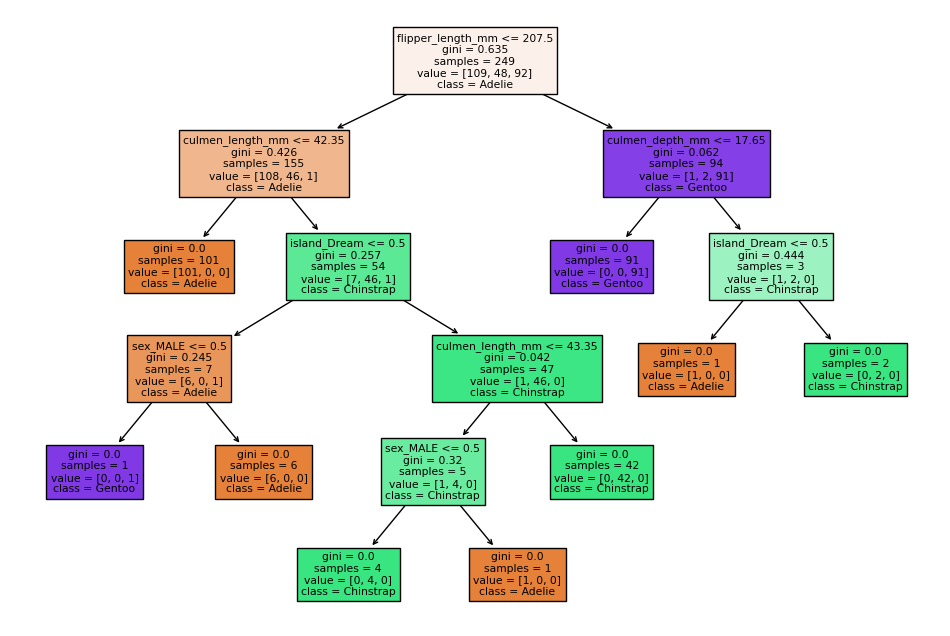

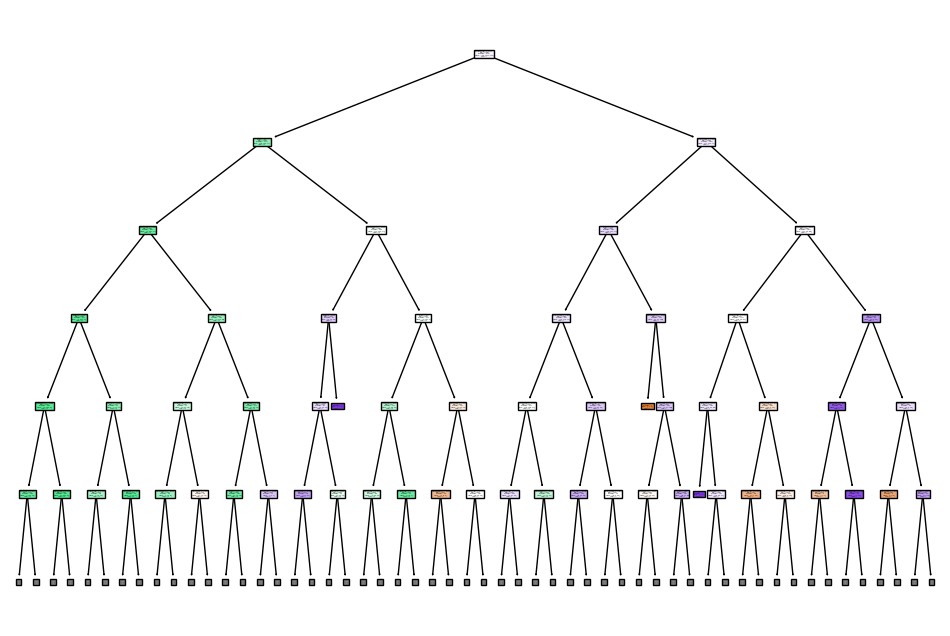

In [136]:
classifier_penguin_bdt = DecisionTreeClassifier()
x_penguin_train_bdt = X_penguin_train.copy()
y_penguin_train_bdt = y_penguin_train.copy()
x_penguin_test_bdt = X_penguin_test.copy()
y_penguin_test_bdt = y_penguin_test.copy()

classifier_penguin_bdt.fit(x_penguin_train_bdt, y_penguin_train_bdt)
y_penguin_pred_bdt = classifier_penguin_bdt.predict(x_penguin_test_bdt)
penguin_f1_bdt = f1_score(y_penguin_test_bdt, y_penguin_pred_bdt, average='weighted')
print("Penguin F1 Score: ", penguin_f1_bdt)
plt.figure(figsize=(12, 8))
plot_tree(classifier_penguin_bdt, filled=True, feature_names=X_penguin.columns, class_names=y_penguin.unique())

classifier_abalone_bdt = DecisionTreeClassifier()
x_abalone_train_bdt = X_abalone_train.copy()
y_abalone_train_bdt = y_abalone_train.copy()
x_abalone_test_bdt = X_abalone_test.copy()
y_abalone_test_bdt = y_abalone_test.copy()

classifier_abalone_bdt.fit(x_abalone_train_bdt, y_abalone_train_bdt)
y_abalone_pred_bdt = classifier_abalone_bdt.predict(x_abalone_test_bdt)
abalone_accuracy_bdt = accuracy_score(y_abalone_test_bdt, y_abalone_pred_bdt)
print("Abalone Accuracy: ", abalone_accuracy_bdt)
plt.figure(figsize=(12, 8))
plot_tree(classifier_abalone_bdt, filled=True, feature_names=X_abalone.columns, class_names=y_abalone.unique(), max_depth=5)
plt.show()

### Top-DT

In [4]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2 , 6 , None],
    'min_samples_split': [ 4 , 3,  6 ]
}
grid_search_penguin_tdt = GridSearchCV(DecisionTreeClassifier(), param_grid)
x_penguin_train_tdt = X_penguin_train.copy()
y_penguin_train_tdt = y_penguin_train.copy()
x_penguin_test_tdt = X_penguin_test.copy()
y_penguin_test_tdt = y_penguin_test.copy()


grid_search_penguin_tdt.fit(x_penguin_train_tdt, y_penguin_train_tdt)
print("Best Parameters Penguin: ", grid_search_penguin_tdt.best_params_)
y_penguin_pred_tdt = grid_search_penguin_tdt.predict(x_penguin_test_tdt)
confusion_matrix_penguin = confusion_matrix(y_penguin_test_tdt, y_penguin_pred_tdt)
print("Confusion Matrix Penguin: ", confusion_matrix_penguin)
penguin_f1 = f1_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='weighted')
print("Penguin F1 Score Weighted: ", penguin_f1)
penguin_f1 = f1_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='macro')
print("Penguin F1 Score Macro: ", penguin_f1)
penguin_accuracy = accuracy_score(y_penguin_test_tdt, y_penguin_pred_tdt)
print("Penguin Accuracy: ", penguin_accuracy)
penguin_precision = precision_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='weighted')
print("Penguin Precision: ", penguin_precision)
penguin_recall = recall_score(y_penguin_test_tdt, y_penguin_pred_tdt, average='weighted')
print("Penguin Recall: ", penguin_recall)

plot_tree(grid_search_penguin_tdt.best_estimator_, filled=True, feature_names=X_penguin.columns, class_names=y_penguin.unique())
plt.show()

grid_search_abalone_tdt = GridSearchCV(DecisionTreeClassifier(), param_grid)
x_abalone_train_tdt = X_abalone_train.copy()
y_abalone_train_tdt = y_abalone_train.copy()
x_abalone_test_tdt = X_abalone_test.copy()
y_abalone_test_tdt = y_abalone_test.copy()

grid_search_abalone_tdt.fit(x_abalone_train_tdt, y_abalone_train_tdt)
print("Best Parameters Abalone: ", grid_search_abalone_tdt.best_params_)
y_abalone_pred_tdt = grid_search_abalone_tdt.predict(x_abalone_test_tdt)
plot_tree(grid_search_abalone_tdt.best_estimator_, filled=True, feature_names=X_abalone.columns, class_names=y_abalone.unique(), max_depth=5)
plt.show()

NameError: name 'X_penguin_train' is not defined

### Base-MLP

In [138]:
neural_network_penguin_bmlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd")
x_penguin_train_bmlp = X_penguin_train.copy()
y_penguin_train_bmlp = y_penguin_train.copy()
x_penguin_test_bmlp = X_penguin_test.copy()
y_penguin_test_bmlp = y_penguin_test.copy()

neural_network_penguin_bmlp.fit(x_penguin_train_bmlp, y_penguin_train_bmlp)
y_penguin_pred_bmlp = neural_network_penguin_bmlp.predict(x_penguin_test_bmlp)
penguin_f1_blmp = f1_score(y_penguin_test_bmlp, y_penguin_pred_bmlp, average='weighted')
print("Penguin F1 Score: ", penguin_f1_blmp)

neural_network_abalone_bmlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", solver="sgd")
x_abalone_train_bmlp = X_abalone_train.copy()
y_abalone_train_bmlp = y_abalone_train.copy()
x_abalone_test_bmlp = X_abalone_test.copy()
y_abalone_test_bmlp = y_abalone_test.copy()

neural_network_abalone_bmlp.fit(x_abalone_train_bmlp, y_abalone_train_bmlp)
y_abalone_pred_bmlp = neural_network_abalone_bmlp.predict(x_abalone_test_bmlp)
abalone_accuracy_blmp = accuracy_score(y_abalone_test_bmlp, y_abalone_pred_bmlp)
print("Abalone Accuracy: ", abalone_accuracy_blmp)


Penguin F1 Score:  0.2693821330184966
Abalone Accuracy:  0.48995215311004786


c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Top-MLP

In [139]:
param_grid = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(30, 50), (10, 10, 10)],
    'solver': ['sgd', 'adam']
}
grid_search_penguin_tmlp = GridSearchCV(MLPClassifier(), param_grid)
x_penguin_train_tmlp = X_penguin_train.copy()
y_penguin_train_tmlp = y_penguin_train.copy()
x_penguin_test_tmlp = X_penguin_test.copy()
y_penguin_test_tmlp = y_penguin_test.copy()

y_penguin_pred_tmlp = neural_network_penguin_bmlp.predict(x_penguin_test_bmlp)
grid_search_penguin_tmlp.fit(x_penguin_train_tmlp, y_penguin_train_tmlp)
print("Best Parameters Penguin: ", grid_search_penguin_tmlp.best_params_)
y_penguin_pred_tmlp = grid_search_penguin_tdt.predict(x_penguin_test_tmlp)

grid_search_abalone_tmlp =  GridSearchCV(MLPClassifier(), param_grid)
x_abalone_train_tmlp = X_abalone_train.copy()
y_abalone_train_tmlp = y_abalone_train.copy()
x_abalone_test_tmlp = X_abalone_test.copy()
y_abalone_test_tmlp = y_abalone_test.copy()

grid_search_abalone_tmlp.fit(x_abalone_train_tmlp, y_abalone_train_tmlp)
print("Best Parameters Abalone: ", grid_search_abalone_tmlp.best_params_)
y_abalone_pred_tmlp = grid_search_abalone_tmlp.predict(x_abalone_test_tmlp)

c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Best Parameters Penguin:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

Best Parameters Abalone:  {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Penguin Performance

### Base-DT

           precision    recall  f1-score
Adelie      0.972222  0.945946  0.958904
Chinstrap   0.904762  0.950000  0.926829
Gentoo      1.000000  1.000000  1.000000

Accuracy: 0.9642857142857143
Macro-Average F1 Score: 0.9619111259605747
Weighted-Average F1 Score: 0.9644766359600974


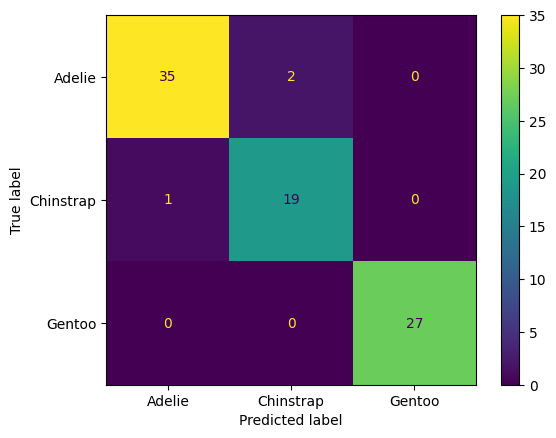

In [140]:
# (A) Heading
f = open("penguin-performance.txt", "a")

f.write("========================================\n")
f.write("(A) Base-DT\n\n")

# (B) Confusion Matrix
confusion_matrix_penguin_bdt = confusion_matrix(y_penguin_test_bdt, y_penguin_pred_bdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_bdt, display_labels=classifier_penguin_bdt.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_penguin_bdt) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_bdt, y_penguin_pred_bdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_penguin_bdt = df.at['accuracy', 'precision']
macro_avg_f1_penguin_bdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_bdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}")

penguin_average['base_dt']['accuracy'].append(accuracy_penguin_bdt)
penguin_average['base_dt']['macro_average'].append(macro_avg_f1_penguin_bdt)
penguin_average['base_dt']['weighted_average'].append(weighted_avg_f1_penguin_bdt)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_penguin_bdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bdt}\n\n")

f.close()

### Top DT

           precision    recall  f1-score
Adelie      0.945946  0.945946  0.945946
Chinstrap   0.904762  0.950000  0.926829
Gentoo      1.000000  0.962963  0.981132



Accuracy: 0.9523809523809523
Macro-Average F1 Score: 0.9513024299034424
Weighted-Average F1 Score: 0.9527041833760654
Best Parameters Penguin:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3}


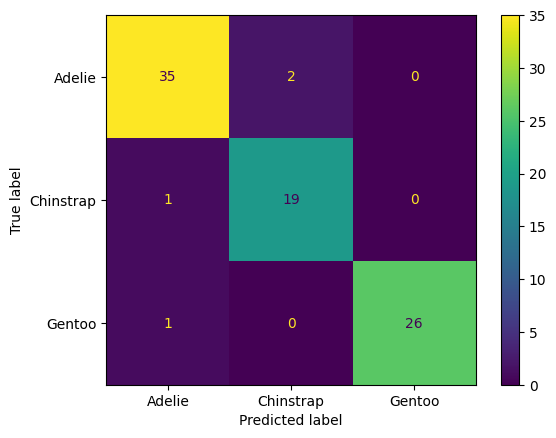

In [141]:
# (A) Heading
f = open("penguin-performance.txt", "a")

f.write("========================================\n")
f.write(f"(A) Top-DT {grid_search_penguin_tdt.best_params_}\n\n")

# (B) Confusion Matrix
confusion_matrix_penguin_tdt = confusion_matrix(y_penguin_test_tdt, y_penguin_pred_tdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_tdt, display_labels=grid_search_penguin_tdt.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_penguin_tdt) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_tdt, y_penguin_pred_tdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_penguin_tdt = df.at['accuracy', 'precision']
macro_avg_f1_penguin_tdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_tdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_tdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_tdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_tdt}")
print("Best Parameters Penguin: ", grid_search_penguin_tdt.best_params_)

penguin_average['top_dt']['accuracy'].append(accuracy_penguin_tdt)
penguin_average['top_dt']['macro_average'].append(macro_avg_f1_penguin_tdt)
penguin_average['top_dt']['weighted_average'].append(weighted_avg_f1_penguin_tdt)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_penguin_tdt}\nMacro-Average F1 Score: {macro_avg_f1_penguin_tdt}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_tdt}\n\n")

f.close()

### Base-MLP

           precision  recall  f1-score
Adelie      0.440476     1.0   0.61157
Chinstrap   0.000000     0.0   0.00000
Gentoo      0.000000     0.0   0.00000

Accuracy: 0.44047619047619047
Macro-Average F1 Score: 0.20385674931129474
Weighted-Average F1 Score: 0.2693821330184966


c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

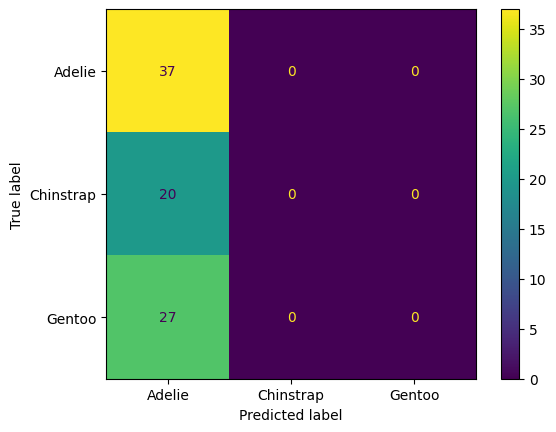

In [142]:
f = open("penguin-performance.txt", "a")

f.write("========================================\n")
f.write(f"(A) Base-MLP\n\n")

# (B) Confusion Matrix
confusion_matrix_penguin_bmlp = confusion_matrix(y_penguin_test_bmlp, y_penguin_pred_bmlp)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_bmlp, display_labels=neural_network_penguin_bmlp.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_penguin_bmlp) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_bmlp, y_penguin_pred_bmlp, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_penguin_bmlp = df.at['accuracy', 'precision']
macro_avg_f1_penguin_bmlp = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_bmlp = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_bmlp}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bmlp}")

penguin_average['base_mlp']['accuracy'].append(accuracy_penguin_bmlp)
penguin_average['base_mlp']['macro_average'].append(macro_avg_f1_penguin_bmlp)
penguin_average['base_mlp']['weighted_average'].append(weighted_avg_f1_penguin_bmlp)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_penguin_bmlp}\nMacro-Average F1 Score: {macro_avg_f1_penguin_bmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_bmlp}\n\n")
f.close()

### Top-MLP

           precision    recall  f1-score
Adelie      0.945946  0.945946  0.945946
Chinstrap   0.904762  0.950000  0.926829
Gentoo      1.000000  0.962963  0.981132

Accuracy: 0.9523809523809523
Macro-Average F1 Score: 0.9513024299034424
Weighted-Average F1 Score: 0.9527041833760654
Best Parameters Penguin:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


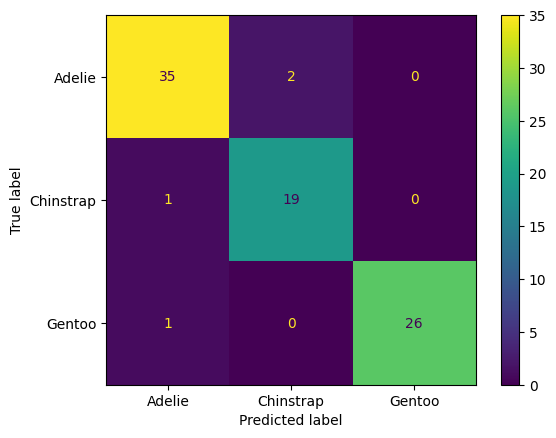

In [143]:
# (A) Heading
f = open("penguin-performance.txt", "a")
f.write("========================================\n")
f.write(f"(A) Top-MLP {grid_search_penguin_tmlp.best_params_}\n\n")

# (B) Confusion Matrix
confusion_matrix_penguin_tmlp = confusion_matrix(y_penguin_test_tmlp, y_penguin_pred_tmlp)
display_cm = ConfusionMatrixDisplay(confusion_matrix_penguin_tmlp, display_labels=grid_search_penguin_tmlp.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_penguin_tmlp) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_penguin_test_tmlp, y_penguin_pred_tmlp, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_penguin_tmlp = df.at['accuracy', 'precision']
macro_avg_f1_penguin_tmlp = df.at['macro avg', 'f1-score']
weighted_avg_f1_penguin_tmlp = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_penguin_tmlp}\nMacro-Average F1 Score: {macro_avg_f1_penguin_tmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_tmlp}")
print("Best Parameters Penguin: ", grid_search_penguin_tmlp.best_params_)

penguin_average['top_mlp']['accuracy'].append(accuracy_penguin_tmlp)
penguin_average['top_mlp']['macro_average'].append(macro_avg_f1_penguin_tmlp)
penguin_average['top_mlp']['weighted_average'].append(weighted_avg_f1_penguin_tmlp)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_penguin_tmlp}\nMacro-Average F1 Score: {macro_avg_f1_penguin_tmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_penguin_tmlp}\n\n")

f.close()

## Abalone Performance

### Base-DT

   precision    recall  f1-score
F   0.408497  0.366569  0.386399
I   0.627907  0.652568  0.640000
M   0.430380  0.455764  0.442708

Accuracy: 0.48899521531100476
Macro-Average F1 Score: 0.48970236561909664
Weighted-Average F1 Score: 0.48682505903828


119

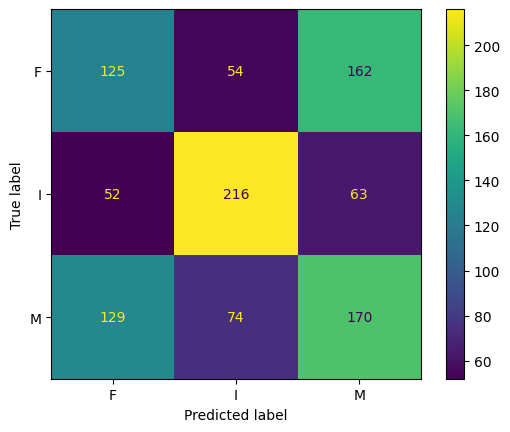

In [144]:
f = open("abalone-performance.txt", "a")

f.write("========================================\n")
f.write("(A) Base-DT\n\n")

# (B) Confusion Matrix
confusion_matrix_abalone_bdt = confusion_matrix(y_abalone_test_bdt, y_abalone_pred_bdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_abalone_bdt, display_labels=classifier_abalone_bdt.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_abalone_bdt) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_abalone_test_bdt, y_abalone_pred_bdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_abalone_bdt = df.at['accuracy', 'precision']
macro_avg_f1_abalone_bdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_abalone_bdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_abalone_bdt}\nMacro-Average F1 Score: {macro_avg_f1_abalone_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_bdt}")

abalone_average['base_dt']['accuracy'].append(accuracy_abalone_bdt)
abalone_average['base_dt']['macro_average'].append(macro_avg_f1_abalone_bdt)
abalone_average['base_dt']['weighted_average'].append(weighted_avg_f1_abalone_bdt)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_abalone_bdt}\nMacro-Average F1 Score: {macro_avg_f1_abalone_bdt}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_bdt}\n\n")

 ### Top-DT

   precision    recall  f1-score
F   0.467480  0.337243  0.391823
I   0.660759  0.788520  0.719008
M   0.455446  0.493298  0.473616

Accuracy: 0.5358851674641149
Macro-Average F1 Score: 0.5281491886726516
Weighted-Average F1 Score: 0.5246528847112168
Best Parameters Penguin:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6}


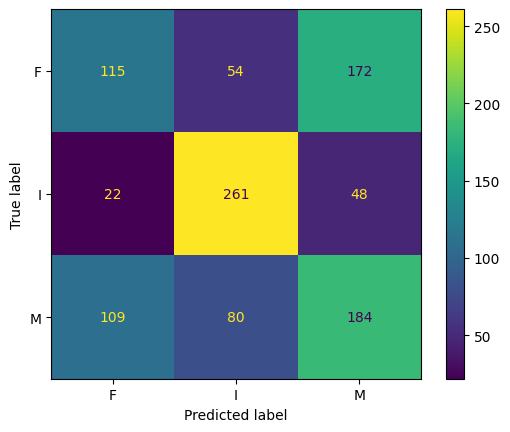

In [145]:
# (A) Heading
f = open("abalone-performance.txt", "a")
f.write("========================================\n")
f.write(f"(A) Top-DT {grid_search_abalone_tdt.best_params_}\n\n")

# (B) Confusion Matrix
confusion_matrix_abalone_tdt = confusion_matrix(y_abalone_test_tdt, y_abalone_pred_tdt)
display_cm = ConfusionMatrixDisplay(confusion_matrix_abalone_tdt, display_labels=grid_search_abalone_tdt.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_abalone_tdt) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_abalone_test_tdt, y_abalone_pred_tdt, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_abalone_tdt = df.at['accuracy', 'precision']
macro_avg_f1_abalone_tdt = df.at['macro avg', 'f1-score']
weighted_avg_f1_abalone_tdt = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_abalone_tdt}\nMacro-Average F1 Score: {macro_avg_f1_abalone_tdt}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_tdt}")
print("Best Parameters Penguin: ", grid_search_abalone_tdt.best_params_)

abalone_average['top_dt']['accuracy'].append(accuracy_abalone_tdt)
abalone_average['top_dt']['macro_average'].append(macro_avg_f1_abalone_tdt)
abalone_average['top_dt']['weighted_average'].append(weighted_avg_f1_abalone_tdt)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_abalone_tdt}\nMacro-Average F1 Score: {macro_avg_f1_abalone_tdt}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_tdt}\n\n")

f.close()

### Base-MLP


   precision    recall  f1-score
F   0.000000  0.000000  0.000000
I   0.779343  0.501511  0.610294
M   0.415865  0.927614  0.574274

Accuracy: 0.48995215311004786
Macro-Average F1 Score: 0.39485599218940687
Weighted-Average F1 Score: 0.39828851896532996


c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ryanw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

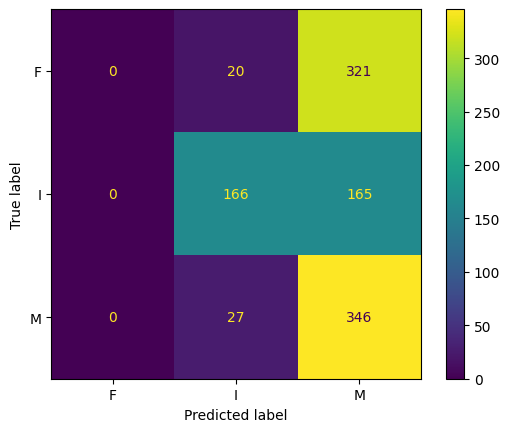

In [146]:
f = open("abalone-performance.txt", "a")

f.write("========================================\n")
f.write("(A) Base-MLP\n\n")

# (B) Confusion Matrix
confusion_matrix_abalone_bmlp = confusion_matrix(y_abalone_test_bmlp, y_abalone_pred_bmlp)
display_cm = ConfusionMatrixDisplay(confusion_matrix_abalone_bmlp, display_labels=neural_network_abalone_bmlp.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_abalone_bmlp) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_abalone_test_bmlp, y_abalone_pred_bmlp, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_abalone_bmlp = df.at['accuracy', 'precision']
macro_avg_f1_abalone_bmlp = df.at['macro avg', 'f1-score']
weighted_avg_f1_abalone_bmlp = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_abalone_bmlp}\nMacro-Average F1 Score: {macro_avg_f1_abalone_bmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_bmlp}")

abalone_average['base_mlp']['accuracy'].append(accuracy_abalone_bmlp)
abalone_average['base_mlp']['macro_average'].append(macro_avg_f1_abalone_bmlp)
abalone_average['base_mlp']['weighted_average'].append(weighted_avg_f1_abalone_bmlp)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_abalone_bmlp}\nMacro-Average F1 Score: {macro_avg_f1_abalone_bmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_bmlp}\n\n")

f.close()

### Top-MLP

   precision    recall  f1-score
F   0.488889  0.193548  0.277311
I   0.688279  0.833837  0.754098
M   0.449902  0.613941  0.519274

Accuracy: 0.5464114832535886
Macro-Average F1 Score: 0.5168945538142397
Weighted-Average F1 Score: 0.5146975358763266
Best Parameters Penguin:  {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


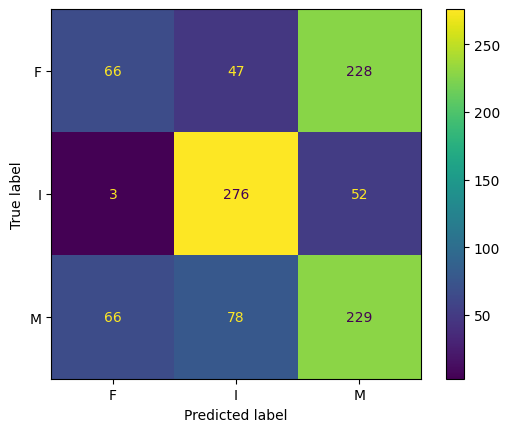

In [147]:
# (A) Heading
f = open("abalone-performance.txt", "a")
f.write("========================================\n")
f.write(f"(A) Top-MLP {grid_search_abalone_tmlp.best_params_}\n\n")

# (B) Confusion Matrix
confusion_matrix_abalone_tmlp = confusion_matrix(y_abalone_test_tmlp, y_abalone_pred_tmlp)
display_cm = ConfusionMatrixDisplay(confusion_matrix_abalone_tmlp, display_labels=grid_search_abalone_tmlp.classes_)
display_cm.plot()

f.write("(B) Confusion Matrix\n")
f.write(str(confusion_matrix_abalone_tmlp) + "\n\n")

# (C) Precision, Recall, F1 Score
report = classification_report(y_abalone_test_tmlp, y_abalone_pred_tmlp, digits=10, output_dict=True)
print(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support']))
print()

f.write("(C) Precision, Recall, F1 Score\n")
f.write(str(pd.DataFrame(report).drop(columns=['macro avg', 'weighted avg', 'accuracy']).transpose().drop(columns=['support'])) + "\n\n")

# (D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score
df = pd.DataFrame(report).transpose()
accuracy_abalone_tmlp = df.at['accuracy', 'precision']
macro_avg_f1_abalone_tmlp = df.at['macro avg', 'f1-score']
weighted_avg_f1_abalone_tmlp = df.at['weighted avg', 'f1-score']
print(f"Accuracy: {accuracy_abalone_tmlp}\nMacro-Average F1 Score: {macro_avg_f1_abalone_tmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_tmlp}")
print("Best Parameters Penguin: ", grid_search_abalone_tmlp.best_params_)

abalone_average['top_mlp']['accuracy'].append(accuracy_abalone_tmlp)
abalone_average['top_mlp']['macro_average'].append(macro_avg_f1_abalone_tmlp)
abalone_average['top_mlp']['weighted_average'].append(weighted_avg_f1_abalone_tmlp)

f.write("(D) Accuracy, Macro-Average F1 Score, Weighted-Average F1 Score\n")
f.write(f"Accuracy: {accuracy_abalone_tmlp}\nMacro-Average F1 Score: {macro_avg_f1_abalone_tmlp}\nWeighted-Average F1 Score: {weighted_avg_f1_abalone_tmlp}\n\n")

f.close()

## Calculate Averages

In [148]:
print(penguin_average)
print(abalone_average)

f = open("penguin-performance.txt", "a")
f.write("========================================\n")

for model in penguin_average:
  f.write(f"PENGUIN {model}\n")
  for metric in penguin_average[model]:
    # print(f"PENGUIN {model} {metric}: {np.mean(penguin_average[model][metric])}")
    f.write(f"\tAverage {metric}: {np.mean(penguin_average[model][metric])}\n")
    f.write(f"\tVariance {metric}: {np.var(penguin_average[model][metric])}\n")
f.close()

f = open("abalone-performance.txt", "a")
f.write("========================================\n")

for model in abalone_average:
  f.write(f"ABALONE {model}\n")
  for metric in abalone_average[model]:
    # print(f"ABALONE {model} {metric}: {np.mean(abalone_average[model][metric])}")
    f.write(f"\tAverage {metric}: {np.mean(abalone_average[model][metric])}\n")
    f.write(f"\tVariance {metric}: {np.var(abalone_average[model][metric])}\n")
f.close()

{'base_dt': {'accuracy': [0.9642857142857143, 0.9761904761904762, 1.0, 0.9761904761904762, 0.9642857142857143], 'macro_average': [0.9594336012246462, 0.9752491533623608, 1.0, 0.9730667754657962, 0.9619111259605747], 'weighted_average': [0.9644770652233339, 0.9764627825005183, 1.0, 0.9763241436925647, 0.9644766359600974]}, 'top_dt': {'accuracy': [0.9761904761904762, 0.9166666666666666, 1.0, 0.9642857142857143, 0.9523809523809523], 'macro_average': [0.976184589010047, 0.914128173885217, 1.0, 0.9491785018100808, 0.9513024299034424], 'weighted_average': [0.9762455213274885, 0.9154477505657213, 1.0, 0.9658819668218166, 0.9527041833760654]}, 'base_mlp': {'accuracy': [0.40476190476190477, 0.39285714285714285, 0.40476190476190477, 0.5119047619047619, 0.44047619047619047], 'macro_average': [0.192090395480226, 0.18803418803418803, 0.192090395480226, 0.22572178477690288, 0.20385674931129474], 'weighted_average': [0.23325262308313158, 0.22161172161172163, 0.23325262308313158, 0.34664416947881516, 